# Example 2: An interactive plot - parameter vs. time

Author: Michael Betz, CERN BE-BI

## Setup

In [1]:
%matplotlib qt
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np

For this example we will initialize PyJapc in "safe mode" so all sets are only simulated (i.e. are not written to the device).

In [2]:
import pyjapc

japc = pyjapc.PyJapc( noSet=True )

japc.setSelector("SCT.USER.ALL")

## Create the initial plot

The plot will be updated with new data in the next step.

We will use a list() to buffer the values for plotting. Compared to numpy arrays, lists are slow but easily extendable.

In [3]:
valueBuffer = list()

This will create an empty plot window with no data yet. Please keep it open for the next steps.

In [9]:
line, = plt.plot( 0, "-o" )
plt.axis((0, 10, -1, 1))
plt.xlabel("Sample no.")
plt.ylabel("Current [{0}]".format( japc.getParam("CB.BHB1100/Acquisition#current_unit") ) )
plt.draw()

## Define a simple callback function, which will update the plot when new data arrives

In [6]:
def myValueCallback( parameterName, newValue ):
    global valueBuffer, line
    valueBuffer.append( newValue ) # Just append the new data to the buffer
    line.set_data( range(len(valueBuffer)) ,valueBuffer )
    line.figure.canvas.draw()

## Start the subscription

In [10]:
valueBuffer.clear()
japc.subscribeParam( "CB.BHB1100/Acquisition#currentAverage", myValueCallback )
japc.startSubscriptions()

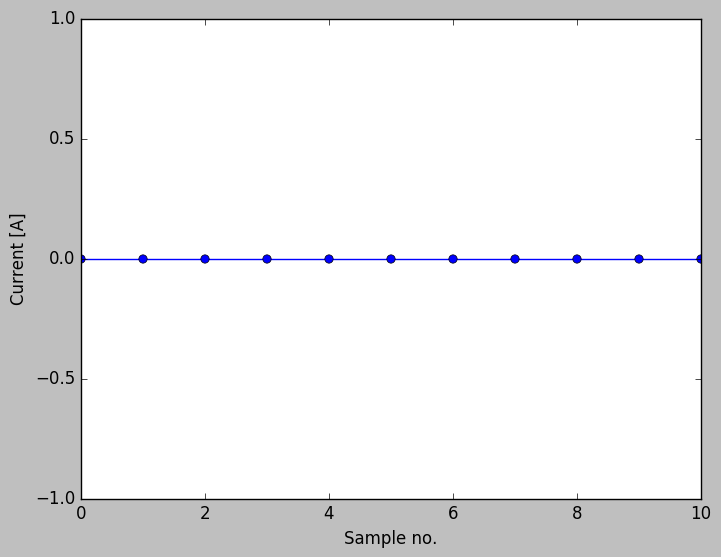

In [11]:
display(plt.gcf())

In [12]:
japc.stopSubscriptions()

## Alternatively: A more fancy callback could implement a rolling view like this

In [13]:
def myValueCallback( parameterName, newValue ):
    global valueBuffer, line
    valueBuffer.append( newValue ) # append the new data to the buffer
    if len( valueBuffer ) > 10:    # Keep max. 10 points in the buffer
        valueBuffer.pop(0)         # Remove the oldest point
    line.set_data( range(len(valueBuffer)) ,valueBuffer )
    line.figure.canvas.draw()

In [14]:
japc.startSubscriptions()

In [16]:
japc.stopSubscriptions()